# Question 3
### Juan M Jimenez

## a

In [1]:
using Pkg
#Pkg.add("LaTeXStrings")
using Plots, Statistics, Distributions, LinearAlgebra, PrettyTables, Random, LaTeXStrings

In [2]:
#Function to generate data
function power(λ,k,R)
    
    #Dimensions of disturbance
    nl=length(λ)

    #Seed for randomness
    Random.seed!(1234)
    
    #Standard normals for each k 
    Z=randn(R,k)
    
    #Critical statistic
    x2stat=quantile(Chisq(k), 0.95)
    
    #Loop to create a matrix of 
    X=zeros(R,nl)
    
    for i=1:nl
       xi=(Z[:,1].+ λ[i]).^2 + sum((Z[:,2:k]).^2, dims=2)
       X[:,i]=( xi .> x2stat)
    end
    
    P=sum(X, dims=1)/R
    
    return P'
end

power (generic function with 1 method)

In [3]:
Λ=[0:0.1:6;]

Π1=power(Λ,1,10^5)
Π5=power(Λ,5,10^5)
Π10=power(Λ,10,10^5)

Π=hcat(Π1, Π5, Π10)

61×3 Matrix{Float64}:
 0.05069  0.05009  0.05094
 0.05171  0.0509   0.05138
 0.05566  0.05179  0.05272
 0.0618   0.05401  0.05434
 0.07002  0.05738  0.05639
 0.07997  0.06169  0.05883
 0.09241  0.06663  0.06197
 0.10898  0.07351  0.06583
 0.12797  0.08088  0.07049
 0.14863  0.08964  0.07596
 0.17158  0.09997  0.08304
 0.19693  0.11196  0.09084
 0.22436  0.12477  0.09907
 ⋮                 
 0.99848  0.98081  0.94717
 0.999    0.98476  0.95586
 0.99927  0.98792  0.96357
 0.99949  0.9907   0.97015
 0.99966  0.99292  0.976
 0.9998   0.99451  0.98031
 0.99988  0.99566  0.98424
 0.99992  0.99676  0.98756
 0.99993  0.9976   0.98999
 0.99996  0.99831  0.99223
 0.99998  0.99873  0.99387
 0.99999  0.99911  0.99547

## b
When $λ=0$ then it can be observed that the asympotic probability of rejection (power) is close to $α=0.05$.

## c

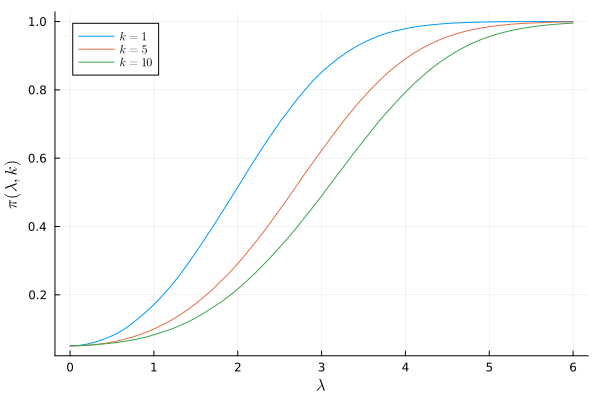

In [4]:
plot(Λ,Π[:,1], label = L"k=1")
plot!(Λ,Π[:,2],label=L"k=5")
plot!(Λ,Π[:,3],label=L"k=10",legend=:topleft)
plot!(xlabel=L"\lambda", ylabel= L"\pi(\lambda,k)")

## d
 It can be seen that for a given value of $\lambda$ the asympotic power is less when ther degrees of freedom increase.